# Vegetarian trends at food.com
The interest in vegetarian and vegan food has grown steadily over the past two decades.

The number of searches for 'veganism' in the UK has increased 900% from 2009 to 2019.[1]

And although in 2015, just 3.4% of all Americans said they were vegetarian, fully a quarter of 25- to 34-year-olds identified as such.[2]

Below, I will explore whether this vegetarian trend extends to the users of [food.com](https://www.food.com/), one of the leading online recipe websites.

[1] [Veganism: Why are vegan diets on the rise?](https://www.bbc.com/news/business-44488051)

[2] [The year of the vegan, The Economist](https://worldin2019.economist.com/theyearofthevegan)

## Questions
1. Is there a positive trend in the number of vegetarian recipes posted on food.com between 2008 and 2017?
2. Is there a positive trend in the number of interactions with vegetarian recipes on Food.com between 2008 and 2017?
2. Is there a difference in the ratings vegetarian recipes received compared to non-vegetarian recipes between 2008 and 2017?

## Dataset
I will be using the [food.com dataset](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions) by Bodhisattwa Prasad Majumder, Shuyang Li, Jianmo Ni, and Julian McAuley.

The dataset consists of 180K+ recipes and 700K+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen).

For the purpose of this exploration study, I will look at data between 2008 and 2017.

## Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from ast import literal_eval

%matplotlib inline

## Palettes

In [40]:
veg_meat = ["#454d66", "#b7e778", "#1fab89"]
sns.set_palette(veg_meat)

## Data import & summary

In [41]:
recipes = pd.read_csv('/input/RAW_recipes.csv')
interactions = pd.read_csv('/input/RAW_interactions.csv')

In [42]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [43]:
print(recipes.info())
recipes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
None


,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


2,147,484,000 minutes sounds like a very long time to cook a recipe. Let's take a closer look at the `minutes` column later on.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc34d63e5d0>,
      dtype=object)

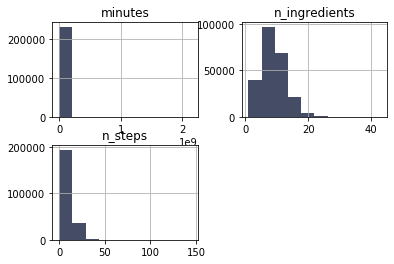

In [44]:
recipes[['minutes', 'n_steps', 'n_ingredients']].hist()

In [45]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [46]:
print(interactions.info())
interactions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB
None


,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.384291e+08,1.608972e+05,4.411016e+00
std,5.014269e+08,1.303987e+05,1.264752e+00
min,1.533000e+03,3.800000e+01,0.000000e+00
25%,1.354700e+05,5.425700e+04,4.000000e+00
50%,3.309370e+05,1.205470e+05,5.000000e+00
75%,8.045500e+05,2.438520e+05,5.000000e+00
max,2.002373e+09,5.377160e+05,5.000000e+00


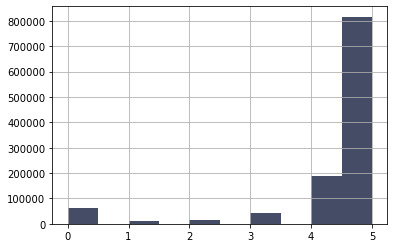

In [47]:
interactions['rating'].hist()

Users tend to rate recipes very highly.

This is unlikely to mean that they are universally satisfied with recipes on food.com. More likely, users who don't like the results of a recipe either don't bother to rate, or blame their own cooking skills, giving the recipe author a benefit of the doubt.

## Data wrangling

Let's start by filtering the dataset down to our chosen 10-year interval.

In [48]:
from_year, to_year = '2008-01-01','2017-12-31'

recipes['submitted'] = pd.to_datetime(recipes['submitted'])
recipes['submitted'] = recipes['submitted'].apply(lambda x: x.tz_localize(None))
recipes_l0y = recipes.loc[recipes['submitted'].between(from_year, to_year, inclusive=False)]

interactions['date'] = pd.to_datetime(interactions['date'])
interactions['date'] = interactions['date'].apply(lambda x: x.tz_localize(None))
interactions_l0y = interactions.loc[interactions['date'].between(from_year, to_year, inclusive=False)]

print(recipes_l0y.shape)
print(interactions_l0y.shape)

(83535, 12)
(710495, 5)


### Remove outliers

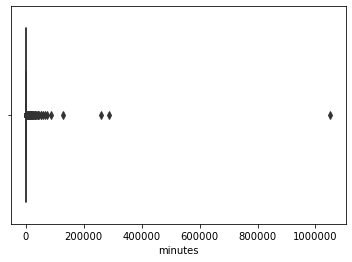

In [49]:
sns.boxplot(x=recipes_l0y["minutes"])

There is clearly at least one extreme outlier in the data set. 694 days is too long of a preparation time for even the tastiest of recipes!

In [50]:
# calculate the first quartile, third quartile and the interquartile range
Q1 = recipes_l0y['minutes'].quantile(0.25)
Q3 = recipes_l0y['minutes'].quantile(0.75)
IQR = Q3 - Q1

# calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the data for values that are greater than max_value or less than min_value
minutes_outliers = recipes_l0y[(recipes_l0y['minutes'] > max_value) | (recipes_l0y['minutes'] < min_value)]
minutes_outliers.sort_values('minutes')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
195076,spiced vanilla cookies,373422,128,1135830,2009-05-20,"['time-to-make', 'course', 'preparation', 'occ...","[105.0, 4.0, 22.0, 2.0, 3.0, 5.0, 5.0]",28,['weigh or measure flour into dry measuring cu...,i love baking cookies. i made these over the ...,"['all-purpose flour', 'ground cinnamon', 'nutm...",11
13003,bagel dogs or mini bagel dogs,380125,128,28177,2009-07-03,"['weeknight', 'time-to-make', 'course', 'main-...","[111.4, 6.0, 4.0, 39.0, 6.0, 8.0, 4.0]",21,"['in a large mixing bowl , dissolve the yeast ...",we were shopping last week when my husband com...,"['active dry yeast', 'brown sugar', 'salt', 'w...",10
27291,bourbon glazed salmon,426721,128,1422300,2010-05-22,"['time-to-make', 'main-ingredient', 'preparati...","[277.6, 9.0, 41.0, 29.0, 68.0, 4.0, 4.0]",11,['combine first 8 ingredients in a large zip-t...,this is how this delicious salmon is served in...,"['brown sugar', 'bourbon', 'low sodium soy sau...",11
70496,deep dark delicious oxtail stew,463229,128,200862,2011-08-29,"['time-to-make', 'course', 'main-ingredient', ...","[147.4, 0.0, 24.0, 13.0, 1.0, 0.0, 4.0]",17,"['rinse the oxtail chunks and , using a large ...",although i know my american friends do not fav...,"['oxtails', 'dry red wine', 'onion', 'salt', '...",10
103021,hazelnut chewies,336533,128,227586,2008-11-11,"['time-to-make', 'course', 'preparation', 'des...","[563.7, 37.0, 199.0, 7.0, 17.0, 26.0, 26.0]",14,['adjust oven racks to upper middle and lower ...,this was published in cook's country 2008 dec ...,"['all-purpose flour', 'baking powder', 'salt',...",12
...,...,...,...,...,...,...,...,...,...,...,...,...
155096,peach cordial,435928,86415,597669,2010-08-24,"['time-to-make', 'course', 'main-ingredient', ...","[111.2, 0.0, 46.0, 0.0, 0.0, 0.0, 3.0]",7,"['in a gallon glass mayonnaise jar , or other ...","now that peach season is here, make some of th...","['peaches', 'granulated sugar', 'cinnamon stic...",6
106964,homemade vanilla extract,463624,129600,1722785,2011-09-05,"['time-to-make', 'preparation', 'occasion', 'f...","[75.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",12,"['carefully open the bottle of brandy', 'pour ...",after getting a very poor bottle of vanilla ex...,"['brandy', 'vanilla beans']",2
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3


As we can see above, the Tukey method filters out many reasonable recipes as outliers. Some recipes, such as pickles, extracts and liqueurs can take many days to prepare, and should not be excluded.

The one extreme outlier at 1051200 minutes is the [How to Preserve a Husband](https://www.food.com/recipe/how-to-preserve-a-husband-447963) recipe. Although it is no doubt very valuable, I will exclude it from the rest of this exploration.

### Exclude How to Preserve a Husband recipe

In [51]:
# filter out recipes that take longer than 730 days as outliers
recipes_l0y = recipes_l0y.query('minutes < 1051200')

### Rating count and average by recipe and year

In [52]:
recipes_l0y['year'] = recipes_l0y['submitted'].dt.year
interactions_l0y['year'] = interactions_l0y['date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
ratings_by_recipe = interactions_l0y.groupby(['recipe_id', 'year']).agg(
    rating_cnt = ('rating', 'count'),
    rating_avg = ('rating', 'mean'),
)
ratings_by_recipe.head()

rating_cnt  rating_avg
recipe_id year                        
38        2008           1         5.0
          2009           1         4.0
          2014           2         4.0
40        2008           1         5.0
          2009           1         5.0

### Merge recipes and ratings

In [54]:
recipes_and_ratings = recipes_l0y.merge(ratings_by_recipe, left_on='id', right_on='recipe_id')
recipes_and_ratings.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,year,rating_cnt,rating_avg
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,2008,1,4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,2011,1,5.0


### Tags to lists

In [55]:
# convert the tags column to list format
recipes_and_ratings['tags'] = recipes_and_ratings['tags'].apply(lambda x: literal_eval(str(x)))

### Add vegan and vegetarian columns, check overlap

In [56]:
# add vegetarian and vegan boolean columns
recipes_and_ratings['vegetarian'] = ['vegetarian' in tag for tag in recipes_and_ratings['tags']]
recipes_and_ratings['vegan'] = ['vegan' in tag for tag in recipes_and_ratings['tags']]
recipes_and_ratings = recipes_and_ratings.drop(columns=['name', 'tags', 'nutrition', 'steps', 'description', 'ingredients'])
recipes_and_ratings.head(2)

,id,minutes,contributor_id,submitted,n_steps,n_ingredients,year,rating_cnt,rating_avg,vegetarian,vegan
0,333281,40,985201,2008-10-27,10,9,2008,1,4.0,False,False
1,453467,45,1848091,2011-04-11,12,11,2011,1,5.0,False,False


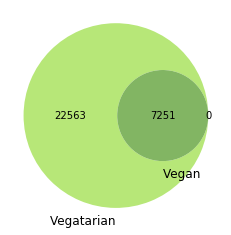

In [57]:
#plot a venn diagram of vegetarian and vegan recipe counts
vegetarian_cnt = len(recipes_and_ratings.query('vegetarian == True'))
vegan_cnt = len(recipes_and_ratings.query('vegan == True'))
intersect_cnt = len(recipes_and_ratings.query('vegetarian == True and vegan == True'))

venn2(subsets = (vegetarian_cnt, vegan_cnt-intersect_cnt, intersect_cnt), set_labels = ('Vegatarian', 'Vegan'), set_colors=('#b7e778', '#031c16', '#031c16'), alpha = 1)

As expected, we can se that the `vegetarian` tag is a superset of the `vegan` category, so we don't need to preprocess the tags any further.

Given the very high likelyhood of users forgetting to tag vegan recipes as vegetarian, we can assume that the tags were automatically generated by the system.

## Exploration

### New recipes by year

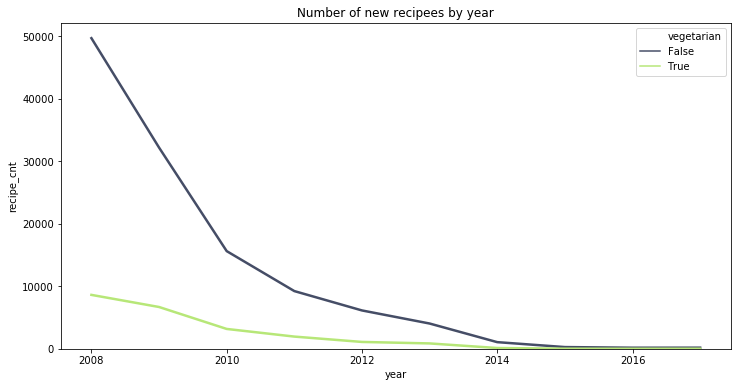

In [58]:
df = recipes_and_ratings.groupby(['year', 'vegetarian']).agg(
    recipe_cnt = ('id', 'count')
).reset_index()

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df, x='year', y='recipe_cnt', hue='vegetarian', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Number of new recipees by year')
ax

We can see that there has been a rapid decline in the number of new recipes posted on food.com over the past decade. Let's see whether the decline has had an equal impact on vegetarian and non-vegetarian recipes.

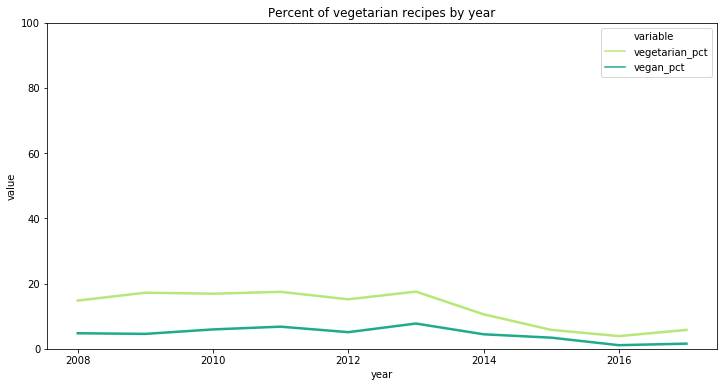

In [59]:
df = recipes_and_ratings.groupby(['year']).agg(
    total_cnt = ('id', 'count'),
    vegetarian_cnt = ('vegetarian', 'sum'),
    vegan_cnt = ('vegan', 'sum'),
).reset_index()

df['vegetarian_pct'] = df['vegetarian_cnt'] / df['total_cnt'] * 100
df['vegan_pct'] = df['vegan_cnt'] / df['total_cnt'] * 100

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=pd.melt(df[['year', 'vegetarian_pct', 'vegan_pct']], ['year']), x='year', y='value', palette=veg_meat[1:], hue='variable', linewidth=2.5)
ax.set(ylim=(0, 100))
ax.set_title('Percent of vegetarian recipes by year')
ax

The vegetarian category has declined at the same rate as the non-vegetarian portion of food.com, and did even worse between 2014–2017.

### Ratings by year

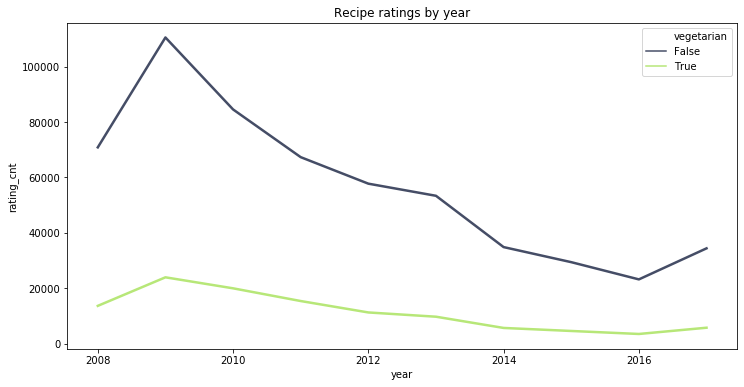

In [60]:
ratings_by_recipe = interactions_l0y.groupby(['recipe_id', 'year']).agg(
    rating_cnt = ('rating', 'count'),
    rating_avg = ('rating', 'mean'),
).reset_index()
ratings_by_recipe = ratings_by_recipe.merge(recipes_and_ratings[['id', 'vegetarian', 'vegan']], left_on='recipe_id', right_on='id')

df = ratings_by_recipe.groupby(['year', 'vegetarian']).agg(
    rating_cnt = ('rating_cnt', 'sum'),
    rating_avg = ('rating_avg', 'mean'),
).reset_index()

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df, x='year', y='rating_cnt', hue='vegetarian', linewidth=2.5)
ax.set_title('Recipe ratings by year')
ax

We can see that there has been a similar decline in the number of interactions (reviews) on the recipes.

The decline started one year later, which could probably be explained by a lag between new recipe postings and ratings. That is, the spike in new recipe postings in 2008 would only convert into interactions in the following year.

Again, let's see whether the decline has had an equal impact on vegetarian and non-vegetarian recipes.

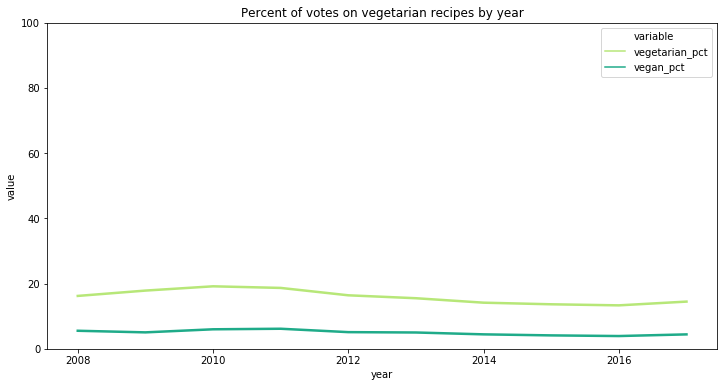

In [61]:
interactions_by_recipe_and_year = interactions_l0y.reset_index().groupby(['recipe_id', 'year']).agg(
    rating_cnt = ('index', 'count'),
    rating_avg = ('rating', 'mean'),
).reset_index()

interactions_and_recipes = interactions_by_recipe_and_year[['recipe_id', 'year', 'rating_cnt', 'rating_avg']].merge(recipes_and_ratings[['id', 'vegetarian', 'vegan']], left_on='recipe_id', right_on='id')

interactions_and_recipes['vegetarian_rating_cnt'] = np.where(interactions_and_recipes['vegetarian'] == True, interactions_and_recipes['rating_cnt'], 0)
interactions_and_recipes['vegan_rating_cnt'] = np.where(interactions_and_recipes['vegan'] == True, interactions_and_recipes['rating_cnt'], 0)

df = interactions_and_recipes.groupby(['year']).agg(
    total_cnt = ('rating_cnt', 'sum'),
    vegetarian_cnt = ('vegetarian_rating_cnt', 'sum'),
    vegan_cnt = ('vegan_rating_cnt', 'sum'),
).reset_index()

df['vegetarian_pct'] = df['vegetarian_cnt'] / df['total_cnt'] * 100
df['vegan_pct'] = df['vegan_cnt'] / df['total_cnt'] * 100

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=pd.melt(df[['year', 'vegetarian_pct', 'vegan_pct']], ['year']), x='year', y='value', palette=veg_meat[1:], hue='variable', linewidth=2.5)
ax.set(ylim=(0, 100))
ax.set_title('Percent of votes on vegetarian recipes by year')
ax

The share of ratings posted on vegetarian and vegan recipes has remained flat through the 10-year period. This time, we don't even see a decline in the period between 2014 and 2017.

This may suggest that although the number of vegetarian contributors has declined at a faster rate than that of non-vegetarian authors, the reader composition remained roughly the same.

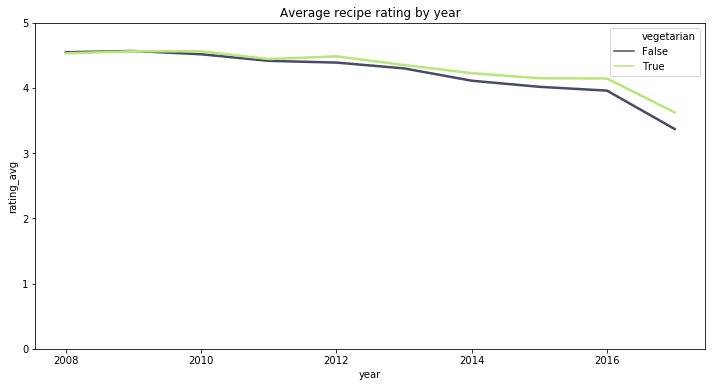

In [62]:
df = ratings_by_recipe.groupby(['year', 'vegetarian']).agg(
    rating_avg = ('rating_avg', 'mean')
).reset_index()

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df, x='year', y='rating_avg', hue='vegetarian', linewidth=2.5)
ax.set(ylim=(0, 5))
ax.set_title('Average recipe rating by year')
ax

The average rating for vegetarian recipes was roughly the same until 2013, but has since grown to ~0.2 points above that of non-vegetarian recipes.

# Cohort analysis
I will next conduct a cohort retention analysis to confirm that the number of vegetarian contributors has indeed declined at a faster rate than that of non-vegetarian authors.

Some of the code below was taken from: http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/

### Add submission year column

In [63]:
recipes_and_cohorts = recipes_and_ratings.copy()
recipes_and_cohorts['submitted_year'] = recipes_and_cohorts['submitted'].apply(lambda x: x.strftime('%Y'))

### Divide users into cohorts

In [64]:
# add cohort column — the year of the user's first recipe submission
recipes_and_cohorts.set_index('contributor_id', inplace=True)
recipes_and_cohorts['contributor_cohort'] = recipes_and_cohorts.groupby(level=0)['submitted'].min().apply(lambda x: x.strftime('%Y'))
recipes_and_cohorts.reset_index(inplace=True)
recipes_and_cohorts.head()

,contributor_id,id,minutes,submitted,n_steps,n_ingredients,year,rating_cnt,rating_avg,vegetarian,vegan,submitted_year,contributor_cohort
0,985201,333281,40,2008-10-27,10,9,2008,1,4.0,False,False,2008,2008
1,1848091,453467,45,2011-04-11,12,11,2011,1,5.0,False,False,2011,2011
2,50969,306168,40,2008-05-30,6,9,2008,1,5.0,False,False,2008,2008
3,50969,306168,40,2008-05-30,6,9,2008,1,5.0,False,False,2008,2008
4,50969,306168,40,2008-05-30,6,9,2008,1,5.0,False,False,2008,2008


In [74]:
def add_cohort_periods(df):
    """
    Creates a `cohort_period` column, which is the Nth period based on the contributor's first recipe.
    """
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

def group_into_cohorts(df):
    """
    Aggregates contributor count, recipe count and cohort period by contributor cohort and year of submission.
    """
    df = df.groupby(['contributor_cohort', 'submitted_year']).agg(
        contributor_cnt = ('contributor_id', 'nunique'),
        recipe_cnt = ('id', 'nunique'),
    )
    df = df.groupby('contributor_cohort').apply(add_cohort_periods)
    return df

# non-vegetarian cohorts
cohorts_nonveg = group_into_cohorts(recipes_and_cohorts[recipes_and_cohorts['vegetarian'] == False])

# vegetarian cohorts
cohorts_veg = group_into_cohorts(recipes_and_cohorts[recipes_and_cohorts['vegetarian'] == True])
cohorts_veg.head()

contributor_cnt  recipe_cnt  cohort_period
contributor_cohort submitted_year                                            
2008               2008                       1500        4265              1
                   2009                        492        2690              2
                   2010                        253        1218              3
                   2011                        155         823              4
                   2012                        121         514              5

### User retention by cohort group

In [77]:
def calculate_cohort_sizes(df):
    """
    Calculates cohort sizes.
    """
    df.reset_index(inplace=True)
    df.set_index(['contributor_cohort', 'cohort_period'], inplace=True)
    return df['contributor_cnt'].groupby('contributor_cohort').first()

# calculate cohort sizes
cohort_sizes_nonveg = calculate_cohort_sizes(cohorts_nonveg)
cohort_sizes_veg = calculate_cohort_sizes(cohorts_veg)
cohort_sizes_veg.head()

contributor_cohort
2008    1500
2009     632
2010     298
2011     157
2012     116
Name: contributor_cnt, dtype: int64

In [82]:
def convert_cohort_counts_to_pct(df, cohort_sizes):
    """
   Converts cohort period contributor counts to percentages.
    """
    df = df.unstack(0).divide(cohort_sizes, axis=1)
    df.reset_index(inplace=True)
    return df

# convert cohort period contributor counts to percentages
contributor_retention_nonveg = convert_cohort_counts_to_pct(cohorts_nonveg['contributor_cnt'], cohort_sizes_nonveg)
contributor_retention_veg = convert_cohort_counts_to_pct(cohorts_veg['contributor_cnt'], cohort_sizes_veg)
contributor_retention_veg

contributor_cohort,cohort_period,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0,1.00,1.0
1,2,0.328000,0.177215,0.127517,0.152866,0.086207,0.028169,0.05,NaN,0.25,NaN
2,3,0.168667,0.077532,0.060403,0.044586,0.025862,0.014085,NaN,NaN,NaN,NaN
3,4,0.103333,0.041139,0.026846,0.019108,0.008621,NaN,NaN,NaN,NaN,NaN
4,5,0.080667,0.023734,0.006711,0.006369,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0.052000,0.004747,0.003356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0.014000,0.003165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.002667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


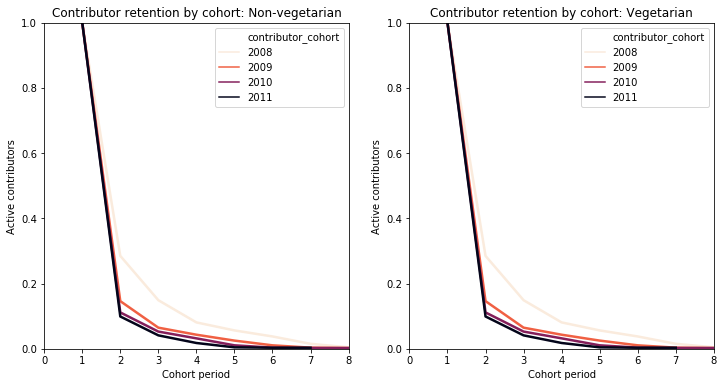

In [88]:
def plot_retention_curves(df, cohorts, title, position):
    """
   Plots retention curves for cohorts.
    """
    plot = sns.lineplot(
        data=pd.melt(contributor_retention_nonveg[['cohort_period'] + cohorts], ['cohort_period']),
        x='cohort_period',
        y='value',
        palette='rocket_r',
        hue='contributor_cohort',
        linewidth=2.5,
        ax=ax[position])
    plot.set(xlim=(0, 8))
    plot.set(ylim=(0, 1))
    plot.set(xlabel='Cohort period')
    plot.set(ylabel='Active contributors')
    plot.set_title('Contributor retention by cohort: ' + title)
    return

# plot contributor retention curves
fig, ax = plt.subplots(1, 2, figsize=(12,6))

cohorts_to_display = ['2008', '2009', '2010', '2011']

plot_retention_curves(contributor_retention_nonveg, cohorts_to_display, 'Non-vegetarian', 0)
plot_retention_curves(contributor_retention_veg, cohorts_to_display, 'Vegetarian', 1)

fig.show()

We can see that contributor retention at food.com has deteriorated significantly over the years.

The difference between the churn of vegetarian and non-vegetarian contributors appears very mild, however, suggesting that higher atrition rate is not the reason for the decline in the proportion of new vegetarian recipes on the site.

## Contributor acquisition
The alternative explanation for the drop in the share of new vegetarian recipes is that we acquire non-vegetarian contributors at a faster rate that non-vegetarian authors.

Text(0.5, 1.0, 'New contributors by year')

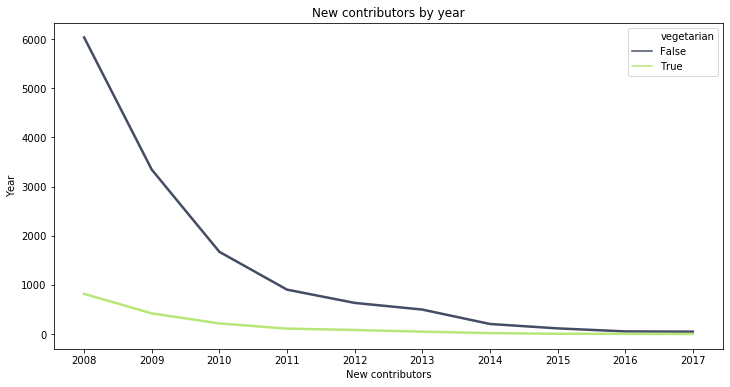

In [69]:
# get first recipe by contributor
df = recipes_and_cohorts.groupby('contributor_id').agg(
    vegetarian = ('vegetarian', 'mean'),
    contributor_cohort = ('contributor_cohort', 'min'),
)
# counting contributors with >50% of vegetarian contibutions as vegetarians
df.reset_index(inplace=True)
df = df.round(0)

# get first recipe by contributor
df = df.groupby(['contributor_cohort', 'vegetarian']).agg(
    contributor_cnt = ('contributor_id', 'count'),
)
# counting contributors with >50% of vegetarian contibutions as vegetarians
df.reset_index(inplace=True)
df['vegetarian'] = df['vegetarian'].astype(bool)

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df, x='contributor_cohort', y='contributor_cnt', palette=veg_meat[:2], hue='vegetarian', linewidth=2.5)
ax.set(xlabel='New contributors')
ax.set(ylabel='Year')
ax.set_title('New contributors by year')

Let's try the same with a logarithmic yscale.

Text(0.5, 1.0, 'New contributors by year')

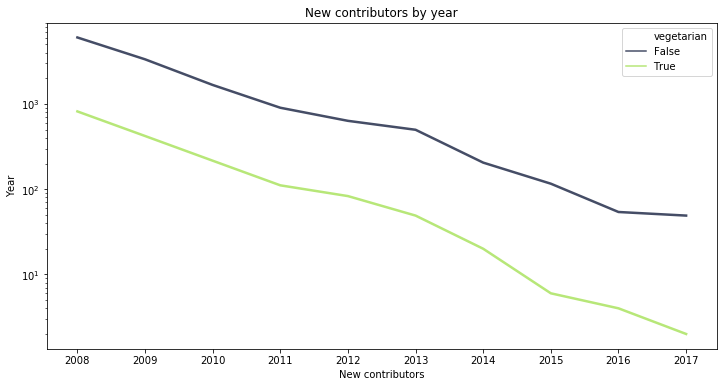

In [70]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df, x='contributor_cohort', y='contributor_cnt', palette=veg_meat[:2], hue='vegetarian', linewidth=2.5)
ax.set(yscale="log")
ax.set(xlabel='New contributors')
ax.set(ylabel='Year')
ax.set_title('New contributors by year')

Indeed, we can see that from 2014 to 2017, the number of vegetarian contributors has dropped at a faster rate than that of non-vegetarian contributors.

## Conclusion
**Is there a positive trend in the number of vegetarian recipes posted on food.com between 2008 and 2017?**

There is no positive trand. Between 2008 and 2013, the number of new vegetarian recipes has fallen year-over-year at the same rate as the number of new non-vegetarian recipes. It then started to fall at an even faster rate than for non-vegetarian recipes between 2014 and 2017.

**Is there a positive trend in the number of interactions with vegetarian recipes on Food.com between 2008 and 2017?**

There is no positive trand. The share of reviews posted on vegetarian and non-vegetarian recipes hsa remained unchanged over the 10-year period.

**Is there a difference in the ratings vegetarian recipes received compared to non-vegetarian recipes between 2008 and 2017?**

Yes, there is a slight positive trend. Vegetarian recipes were rated the same between 2008 and 2013, but started to attract higher ratings from there on. As of 2018, vegetarian recipe average ratings are 0.2 points higher than those of non-vegetarian recipes. 

### Business implications
We can conclude that the growing vegetarian trend has had no positive impact on food.com, and might have even had a negative impact on our contributor acqusition.